# Digit Recognizer using built-in Neural Network 

## Description:
- If you have some experience with R or Python and machine learning basics, but you’re new to computer vision. This is the perfect introduction to techniques like neural networks using a classic dataset including pre-extracted features.
- MNIST ("Modified National Institute of Standards and Technology") is the de facto “hello world” dataset of computer vision. Since its release in 1999, this classic dataset of handwritten images has served as the basis for benchmarking classification algorithms. As new machine learning techniques emerge, MNIST remains a reliable resource for researchers and learners alike.
- Your goal is to correctly identify digits from a dataset of tens of thousands of handwritten images.

## Data loading and pre-processing

In [2]:
# Importing libraries
import numpy as np
import pandas as pd

In [3]:
# Importing data 
traindata = pd.read_csv("train.csv")
testdata = pd.read_csv("test.csv")

In [5]:
# Looking at top 5 lines from the train data
traindata.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [37]:
# Looking at top 5 lines from the test data
testdata.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [38]:
# Dimensions of the train and test data
print("Train data: ", traindata.shape)
print("\nTest data: ", testdata.shape)

Train data:  (42000, 785)

Test data:  (28000, 784)


## Plotting images 

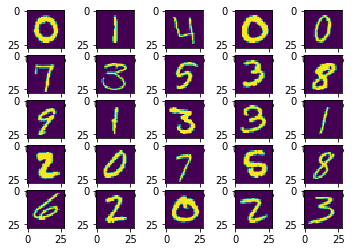

In [7]:
# Importing libraries for plotting images
import matplotlib.pyplot as plt
import math

# Plotting images
fig = plt.figure()

for i in range(1,26):
    ax = fig.add_subplot(5,5,i)
    data = traindata.iloc[i, 1:len(traindata)].values
    grid = data.reshape(int(math.sqrt(len(traindata.iloc[1, 1:len(traindata)]))),int(math.sqrt(len(traindata.iloc[1, 1:len(traindata)]))))
    ax.imshow(grid)

plt.show()

# Neural Network

In [10]:
# Importing neural network library
from sklearn.neural_network import MLPClassifier

In [11]:
# Separating label from the original data to train neural network
trainy = traindata.iloc[:, 0]
trainx = traindata.iloc[:, 1:]

In [12]:
# Training model
clf = MLPClassifier()
clf.fit(trainx, trainy)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [15]:
# Importing libraries
from sklearn import metrics

# Measuring accuracy of training set
print("Training model accuracy: ", metrics.accuracy_score(expected, predicted))

Training model accuracy:  0.985404761905


In [19]:
# Predicting test data using train model
result = pd.DataFrame(clf.predict(testdata), columns = ["Label"])

# Resetting index
result.reset_index(inplace = True)

# Renaming column names
result.rename(columns = {'index': 'ImageId'}, inplace = True)
result['ImageId'] = result['ImageId'] + 1

# Remove below comment to store result into .csv format.
#result.to_csv('result.csv', index = False)